# 잔차 분석
## 잔차 분석의 이해
### 잔차란
- `실제 관측값`과 `예측값`의 `사이`
- 즉, 예측값에 대한 오차를 의미함
- $잔차 = 실제관측값 - 예측값$

### 잔차 분석
- 회귀분석 수행 후 회귀분석이 적절하게 수행되었는지, 모델이 데이터에 적합한지를 평가하기 위해 사용
1. 잔차의 선형성
2. 잔차의 정규성
3. 잔차의 등분산성
4. 잔차의 독립성

## 1. 작업 준비
#### 패키지 참조, 그래프 초기화

In [2]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys, os
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols, scalling # scalling: 데이터프레임 표준화 처리

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

#### 데이터 가져오기

In [3]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 데이터 전처리
##### 데이터 표준화

In [4]:
x, y = scalling(df, yname='dist')
df = merge(x, y, left_index=True, right_index=True)
df

,speed,dist
0,-2.177858,-1.606405
1,-2.177858,-1.292807
2,-1.604738,-1.528005
3,-1.604738,-0.822410
4,-1.413697,-1.057609
5,-1.222657,-1.292807
6,-1.031617,-0.979209
7,-1.031617,-0.665611
8,-1.031617,-0.352014
9,-0.840577,-1.018409


#### 회귀분석

In [5]:
ols = my_ols(df, x='speed', y='dist')
ols

## 2. 잔차 분석 수행
### 0) 잔차 구하기
#### 예측값
- `.fit.predict(컬럼)`

In [15]:
y = ols.fit.predict(df['speed'])
y

0    -1.757303
1    -1.757303
2    -1.294855
3    -1.294855
4    -1.140705
5    -0.986556
6    -0.832406
7    -0.832406
8    -0.832406
9    -0.678257
10   -0.678257
11   -0.524108
12   -0.524108
13   -0.524108
14   -0.524108
15   -0.369958
16   -0.369958
17   -0.369958
18   -0.369958
19   -0.215809
20   -0.215809
21   -0.215809
22   -0.215809
23   -0.061660
24   -0.061660
25   -0.061660
26    0.092490
27    0.092490
28    0.246639
29    0.246639
30    0.246639
31    0.400788
32    0.400788
33    0.400788
34    0.400788
35    0.554938
36    0.554938
37    0.554938
38    0.709087
39    0.709087
40    0.709087
41    0.709087
42    0.709087
43    1.017386
44    1.171535
45    1.325684
46    1.325684
47    1.325684
48    1.325684
49    1.479834
dtype: float64

#### 회귀분석 결과에 내장된 예측값
- `.predict()` 함수의 결과와 동일함

In [16]:
y = ols.fit.fittedvalues
y

0    -1.757303
1    -1.757303
2    -1.294855
3    -1.294855
4    -1.140705
5    -0.986556
6    -0.832406
7    -0.832406
8    -0.832406
9    -0.678257
10   -0.678257
11   -0.524108
12   -0.524108
13   -0.524108
14   -0.524108
15   -0.369958
16   -0.369958
17   -0.369958
18   -0.369958
19   -0.215809
20   -0.215809
21   -0.215809
22   -0.215809
23   -0.061660
24   -0.061660
25   -0.061660
26    0.092490
27    0.092490
28    0.246639
29    0.246639
30    0.246639
31    0.400788
32    0.400788
33    0.400788
34    0.400788
35    0.554938
36    0.554938
37    0.554938
38    0.709087
39    0.709087
40    0.709087
41    0.709087
42    0.709087
43    1.017386
44    1.171535
45    1.325684
46    1.325684
47    1.325684
48    1.325684
49    1.479834
dtype: float64

#### 잔차(직접계산)

In [17]:
residual = df['dist'] - y
residual

0     0.150898
1     0.464496
2    -0.233151
3     0.472444
4     0.083097
5    -0.306251
6    -0.146803
7     0.166795
8     0.480393
9    -0.340152
10    0.091045
11   -0.611900
12   -0.376702
13   -0.219903
14   -0.063104
15   -0.295653
16    0.017945
17    0.017945
18    0.488342
19   -0.449802
20   -0.057805
21    0.882988
22    1.666983
23   -0.839150
24   -0.603952
25    0.493641
26   -0.522903
27   -0.209305
28   -0.677052
29   -0.363454
30    0.028543
31   -0.439204
32    0.109592
33    0.893587
34    1.207184
35   -0.828552
36   -0.436554
37    0.425840
38   -1.139500
39   -0.512304
40   -0.355505
41   -0.198707
42    0.114891
43   -0.115008
44   -0.739554
45   -0.266508
46    0.595886
47    0.635086
48    1.693479
49    0.167339
dtype: float64

#### 회귀분석 결과에 내장된 잔차값

In [18]:
residual = ols.fit.resid
residual

0     0.150898
1     0.464496
2    -0.233151
3     0.472444
4     0.083097
5    -0.306251
6    -0.146803
7     0.166795
8     0.480393
9    -0.340152
10    0.091045
11   -0.611900
12   -0.376702
13   -0.219903
14   -0.063104
15   -0.295653
16    0.017945
17    0.017945
18    0.488342
19   -0.449802
20   -0.057805
21    0.882988
22    1.666983
23   -0.839150
24   -0.603952
25    0.493641
26   -0.522903
27   -0.209305
28   -0.677052
29   -0.363454
30    0.028543
31   -0.439204
32    0.109592
33    0.893587
34    1.207184
35   -0.828552
36   -0.436554
37    0.425840
38   -1.139500
39   -0.512304
40   -0.355505
41   -0.198707
42    0.114891
43   -0.115008
44   -0.739554
45   -0.266508
46    0.595886
47    0.635086
48    1.693479
49    0.167339
dtype: float64

#### 분석결과가 내장하고 있는 독립변수 데이터 set

In [19]:
ols.fit.model.exog

array([[ 1.        , -2.17785805],
       [ 1.        , -2.17785805],
       [ 1.        , -1.60473751],
       [ 1.        , -1.60473751],
       [ 1.        , -1.41369733],
       [ 1.        , -1.22265715],
       [ 1.        , -1.03161697],
       [ 1.        , -1.03161697],
       [ 1.        , -1.03161697],
       [ 1.        , -0.84057679],
       [ 1.        , -0.84057679],
       [ 1.        , -0.64953661],
       [ 1.        , -0.64953661],
       [ 1.        , -0.64953661],
       [ 1.        , -0.64953661],
       [ 1.        , -0.45849643],
       [ 1.        , -0.45849643],
       [ 1.        , -0.45849643],
       [ 1.        , -0.45849643],
       [ 1.        , -0.26745625],
       [ 1.        , -0.26745625],
       [ 1.        , -0.26745625],
       [ 1.        , -0.26745625],
       [ 1.        , -0.07641607],
       [ 1.        , -0.07641607],
       [ 1.        , -0.07641607],
       [ 1.        ,  0.11462411],
       [ 1.        ,  0.11462411],
       [ 1.        ,

#### 원본 데이터프레임에 병합

In [20]:
df['예측값'] = y
df['잔차'] = residual
df.head()

,speed,dist,예측값,잔차
0,-2.177858,-1.606405,-1.757303,0.150898
1,-2.177858,-1.292807,-1.757303,0.464496
2,-1.604738,-1.528005,-1.294855,-0.233151
3,-1.604738,-0.822410,-1.294855,0.472444
4,-1.413697,-1.057609,-1.140705,0.083097


### 1) 잔차의 선형성
#### 잔차 시각화
- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다
- 빨간 실선은 잔차의 추세를 의미
- 빨간 실선이 점선에서 크게 벗어난다면 잔차가 크게 달라진다는 의미이므로 선형성이 없다는 것이다.

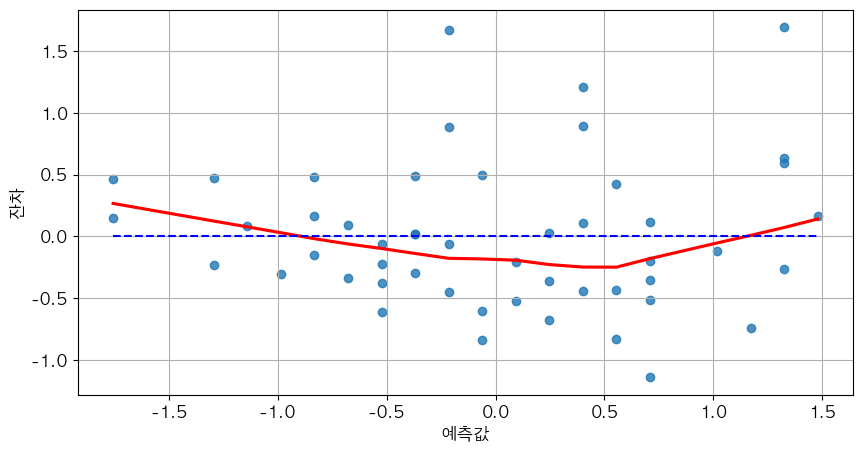

In [22]:
xmin = df['예측값'].min()
xmax = df['예측값'].max()
xrange = [xmin, xmax]
yrange = [0, 0]

plt.figure()
sb.regplot(data = df, x='예측값', y='잔차', lowess = True,
           line_kws={'color': 'red'})
sb.lineplot(x=xrange, y=yrange, color='blue', linestyle='--')
plt.grid()
plt.show()
plt.close()

### 2) 잔차의 정규성
- 잔차가 정규분포를 따르는지 확인
##### 시각화
- Q-Q plot으로 확인
- 잔차가 정규분포를 따르면 Q-Q Plot에서 점들이 점선을 따라 배치된다.
- 구해 놓은 예측값을 활용하여 zscore 값을 구한다.
##### zscore 구하기
- `stats.zscore(컬럼)`

In [23]:
df['zscore'] = stats.zscore(df['예측값'])
df.head()

,speed,dist,예측값,잔차,zscore
0,-2.177858,-1.606405,-1.757303,0.150898,-2.177858
1,-2.177858,-1.292807,-1.757303,0.464496,-2.177858
2,-1.604738,-1.528005,-1.294855,-0.233151,-1.604738
3,-1.604738,-0.822410,-1.294855,0.472444,-1.604738
4,-1.413697,-1.057609,-1.140705,0.083097,-1.413697


##### Q-Q Plot 그리기

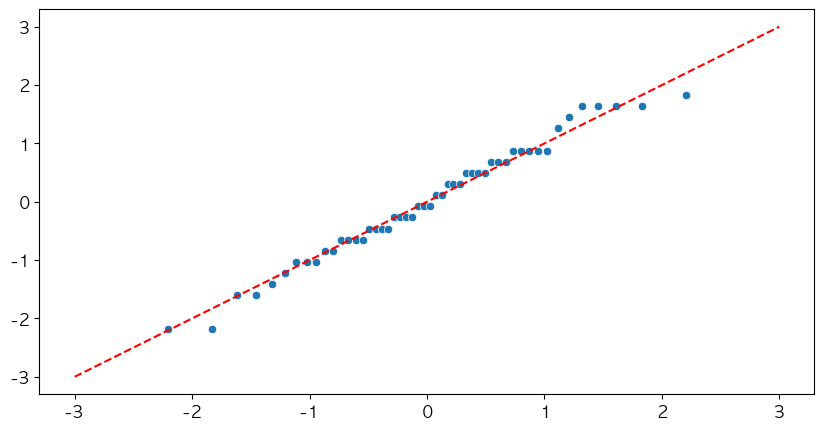

In [25]:
(x, y), _ = stats.probplot(df['zscore'])

sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

##### 잔차도
- 잔차가 정규분포를 따른다면 대략적으로,
    - $\pm\sqrt{MSE}$ 범위 안에 최소 `68%`의 잔차가 포함된다.
    - $\pm2\sqrt{MSE}$ 범위 안에 최소 `95%`의 잔차가 포함된다.
    - $\pm3\sqrt{MSE}$ 범위 안에 최소 `99%`의 잔차가 포함된다.

In [26]:
MSE_sq = np.sqrt(ols.fit.mse_resid)
r = ols.fit.resid

r1 = r[ (r > -MSE_sq) & (r < MSE_sq)].count() / r.count() * 100
r2 = r[ (r > -2*MSE_sq) & (r < 2*MSE_sq)].count() / r.count() * 100
r3 = r[ (r > -3*MSE_sq) & (r < 3*MSE_sq)].count() / r.count() * 100

mse_r = [r1, r2, r3]

print(f"루트 1MSE 구간에 포함된 잔차 비율: {r1:1.2f}%")
print(f"루트 2MSE 구간에 포함된 잔차 비율: {r2:1.2f}%")
print(f"루트 3MSE 구간에 포함된 잔차 비율: {r3:1.2f}%")

루트 1MSE 구간에 포함된 잔차 비율: 74.00%
루트 2MSE 구간에 포함된 잔차 비율: 94.00%
루트 3MSE 구간에 포함된 잔차 비율: 100.00%


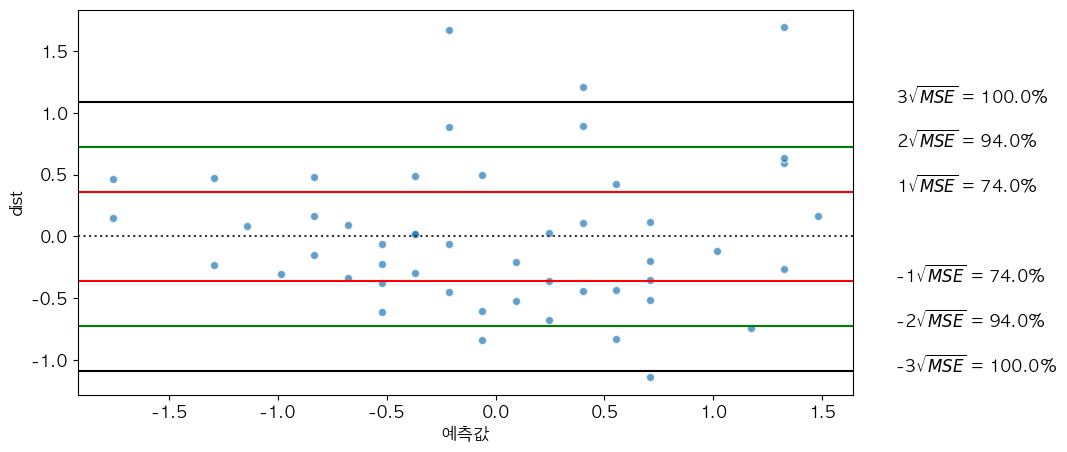

In [27]:
mse_sq = ols.fit.mse_resid


# 예측값과 실제값간의 잔차를 구해서 표시해주는 그래프
sb.residplot(data=df, x='예측값', y='dist', scatter_kws = {'edgecolor':"white", "alpha":0.7})

for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline((i+1) * mse_sq, color=c)
    plt.axhline(-(i+1) * mse_sq, color=c)

# 현재 표시되는 그래프의 x축 범위를 가져온다.
xmin, xmax = plt.xlim()

for i, c in enumerate(['red', 'green', 'black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i], x=xmax+0.2, y=(i+1) * mse_sq)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i], x=xmax+0.2, y=-(i+1) * mse_sq)

plt.show()
plt.close()

#### 샤피로 검정을 통한 정규성 검정
- 표본수가 50개 미만인 경우 (중심극한정리를 감안할 경우 30개 미만)
> 이 예제는 표본수가 50개임

| 가설 | 내용 |
|--|--|
| 귀무가설 | 표본의 모집단이 정규분포를 따름 |
| 대립가설 | 표본의 모집단이 정규분포를 따르지 않음 |

In [28]:
s, p = stats.shapiro(df['잔차'])
print("Shapiro-Wilk Test: (통계량, p-value) = ", (s, p))

if p > 0.05:
    print("잔차는 정규 분포를 따릅니다. (귀무가설 채택)")
else:
    print("잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

Shapiro-Wilk Test: (통계량, p-value) =  (0.9450910687446594, 0.02152557671070099)
잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)


#### Kolmogorov Smirnov 검정
- 표본 수가 50개 이상인 경우 (중심극한 정리를 감안할 경우 30개 이상)

In [29]:
s, p = stats.kstest(df['잔차'], 'norm')
print("Kolmogorov Smirnov Test: (통계량, p-value) = ", (s, p))

if p > 0.05:
    print("잔차는 정규 분포를 따릅니다. (귀무가설 채택)")
else:
    print("잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

Kolmogorov Smirnov Test: (통계량, p-value) =  (0.18069257855590273, 0.06702997329319504)
잔차는 정규 분포를 따릅니다. (귀무가설 채택)


#### 잔차의 등분산성
- 회귀모형을 통해 예측된 모든 값들에 대하여 잔차의 분산이 동일하다는 가정

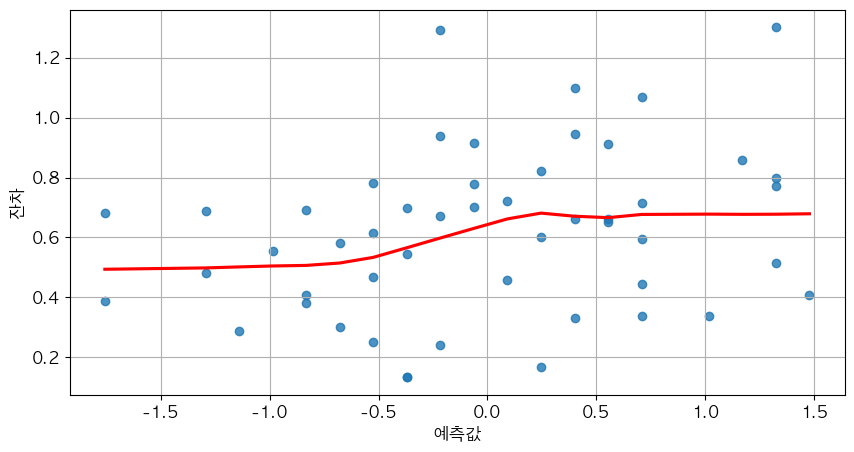

In [30]:
sb.regplot(x=df['예측값'], y=np.sqrt(np.abs(df['잔차'])), lowess=True, line_kws={'color':'red'})
plt.grid()
plt.show()
plt.close()

#### 브로이슈-패건 검정
|가설|설명|
|-:|-|
|귀무가설|등분산성 가정이 만족된다 (오차의 분산은 독립변수들과 관련이 없다)|
|대립가설|등분산성 가정이 만족되지 않는다(오차의 분산은 독립변수들과 관련이 있다)|

In [31]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test_result = het_breuschpagan(ols.fit.resid, ols.fit.model.exog)
DataFrame(test_result, index=names)

,0
Lagrange multiplier statistic,3.214880
p-value,0.072972
f-value,3.298361
f p-value,0.075597


### 3) 잔차의 독립성
- 회귀분석 결과표 하단의 Dubin-Watson 값을 확인한다.

| 수치 | 해석 |
|-:|-|
| `0` | 잔차들이 양의 상관 관계 (독립성 `X`) |
| `2` | 잔차들이 독립|
| `4` | 잔차들이 음의 상관 관계 (독립성 `X`) |

- 일반적으로 DW값이 `1.5 ~ 2.5` 범위에 있으면 독립으로 판정

In [32]:
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.49e-12
Time:                        09:33:15   Log-Likelihood:                -44.624
No. Observations:                  50   AIC:                             93.25
Df Residuals:                      48   BIC:                             97.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.822e-16      0.085   2.14e-15      1.000      -0.171       0.171
speed          0.8069      0.085      9.464      0.000       0.635       0.978
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print('dw: ', durbin_watson(df['잔차']))
print('dw값이 1.5와 2.5 범위 안에 있으므로 잔차는 독립적이다.')

dw:  1.6762253234350977
dw값이 1.5와 2.5 범위 안에 있으므로 잔차는 독립적이다.
